In [2]:
import pandas as pd
Microsoft=pd.read_csv('Microsoft_data.csv')
Microsoft

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56751,01a3aaeba82aa3de04506d45fe2f8293,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1056.0,0,7.0,0,NaN,53447.0,...,63568.0,1,NaN,0.0,0,0,0.0,1.0,3.0,0
56752,01a3aef1a1af51ef3e4aa0a1c99bf8b6,win8defender,1.1.15100.1,4.18.1807.18075,1.273.689.0,0,7.0,0,NaN,41571.0,...,33211.0,1,0.0,0.0,0,0,0.0,1.0,1.0,1
56753,01a3af52c05b6af7d971d5f3092c3a80,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1454.0,0,7.0,0,NaN,53447.0,...,44032.0,0,NaN,0.0,0,0,0.0,1.0,11.0,0
56754,01a3b0c12114367eb99eaa2fac6b754c,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,43856.0,...,60903.0,0,0.0,0.0,0,0,0.0,0.0,8.0,1


In [3]:
Microsoft.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [4]:
contingency_table=pd.crosstab(Microsoft['Census_OEMNameIdentifier'],Microsoft['HasDetections'])

In [6]:
import scipy.stats as stats
result=stats.chi2_contingency(contingency_table)
result

(1119.018373337858,
 2.572618632017631e-24,
 677,
 array([[0.498414, 0.501586],
        [0.498414, 0.501586],
        [0.498414, 0.501586],
        ...,
        [0.498414, 0.501586],
        [0.498414, 0.501586],
        [0.996828, 1.003172]]))

In [15]:
p_value=[]
for col in Microsoft.columns:
    crosstab=pd.crosstab(Microsoft[col],Microsoft['HasDetections'])
    result=stats.chi2_contingency(crosstab)
    p_value.append(result[1])

In [16]:
p_value

[0.4980264944858225,
 0.6701546735744655,
 5.240160963534993e-175,
 2.679674642374802e-100,
 6.69232381065425e-30,
 1.0,
 4.093401776465353e-25,
 2.6880955778524482e-08,
 3.535623705634574e-07,
 2.2118523406046106e-138,
 5.257362540725805e-246,
 1.200027160330255e-38,
 0.6830219012044623,
 1.6552788604437115e-43,
 0.0003214930212068522,
 0.0013097180268720377,
 1.5798548447364545e-28,
 1.2947217277839083e-23,
 0.015313253675991567,
 2.1595456875209207e-70,
 0.5191059999806182,
 1.434114178500418e-17,
 2.35576395259448e-07,
 2.1466437181379368e-23,
 1.2642341679080673e-44,
 3.911500457675662e-06,
 5.63893413755677e-48,
 1.0,
 1.0,
 0.0018417016101329635,
 1.5710863745134847e-15,
 0.0,
 0.9141065313638638,
 0.3118662157408029,
 1.2265256180858859e-55,
 0.0020540261546470773,
 2.572618632017631e-24,
 2.0818278817223593e-12,
 1.6167716056713354e-53,
 0.08838356082511502,
 1.6534168200672743e-39,
 0.07595760041022881,
 7.68524403557606e-67,
 2.541452309742497e-13,
 0.0072577556974884536,
 0

In [17]:
chi2_value=pd.DataFrame({'Column':Microsoft.columns,'p_value':p_value})
chi2_value

,Column,p_value
0,MachineIdentifier,4.980265e-01
1,ProductName,6.701547e-01
2,EngineVersion,5.240161e-175
3,AppVersion,2.679675e-100
4,AvSigVersion,6.692324e-30
...,...,...
78,Census_IsPenCapable,1.240585e-02
79,Census_IsAlwaysOnAlwaysConnectedCapable,1.566188e-46
80,Wdft_IsGamer,1.886959e-30
81,Wdft_RegionIdentifier,6.974518e-18


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\priyankita praharaj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 4 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\priyankita praharaj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 4 missing from current font.
  font.set_text(s, 0, flags=flags)


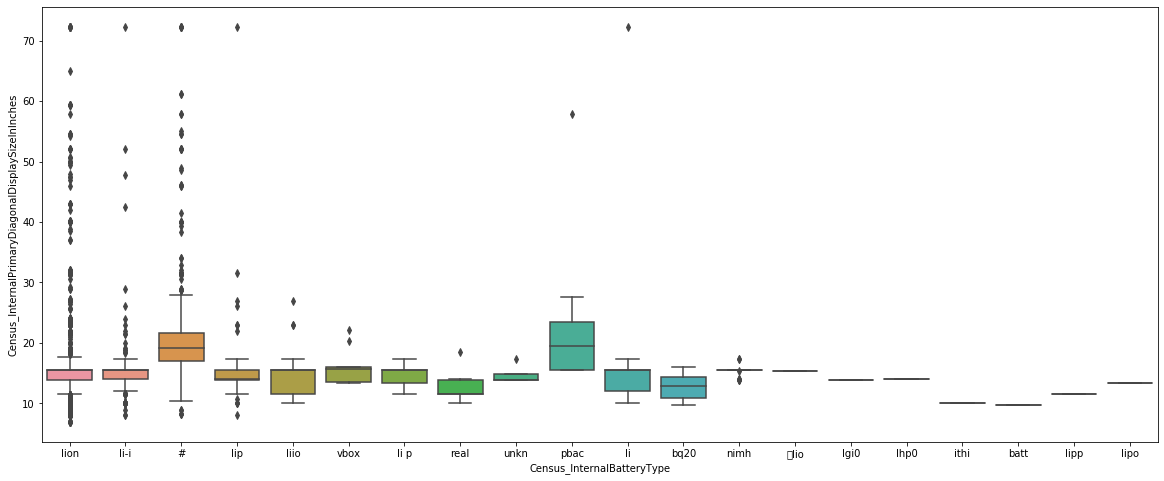

In [20]:
plt.figure(figsize=(20,8))
sns.boxplot(x=Microsoft['Census_InternalBatteryType'],y=Microsoft['Census_InternalPrimaryDiagonalDisplaySizeInInches'])

In [22]:
import statsmodels.formula.api as smf

In [24]:
model=smf.ols(formula='Census_InternalPrimaryDiagonalDisplaySizeInInches~Census_InternalBatteryType',data=Microsoft)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                           
=============================================================================================================
Dep. Variable:     Census_InternalPrimaryDiagonalDisplaySizeInInches   R-squared:                       0.136
Model:                                                           OLS   Adj. R-squared:                  0.135
Method:                                                Least Squares   F-statistic:                     135.1
Date:                                               Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                                                       20:48:11   Log-Likelihood:                -44054.
No. Observations:                                              16256   AIC:                         8.815e+04
Df Residuals:                                                  16236   BIC:                         8.830e+04
Df Model:                                                         19                                         
Covariance Type:                                           nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             15.4000      3.639      4.232      0.000       8.267      22.533
Census_InternalBatteryType[T.#]        4.8494      3.641      1.332      0.183      -2.286      11.985
Census_InternalBatteryType[T.batt]    -5.7000      5.146     -1.108      0.268     -15.787       4.387
Census_InternalBatteryType[T.bq20]    -2.7000      3.817     -0.707      0.479     -10.181       4.781
Census_InternalBatteryType[T.ithi]    -5.4000      4.457     -1.212      0.226     -14.136       3.336
Census_InternalBatteryType[T.lgi0]    -1.5000      4.202     -0.357      0.721      -9.736       6.736
Census_InternalBatteryType[T.lhp0]    -1.4000      4.457     -0.314      0.753     -10.136       7.336
Census_InternalBatteryType[T.li]       0.4250      3.684      0.115      0.908      -6.796       7.646
Census_InternalBatteryType[T.li p]    -0.8143      3.671     -0.222      0.824      -8.010       6.382
Census_InternalBatteryType[T.li-i]    -0.2677      3.640     -0.074      0.941      -7.403       6.867
Census_InternalBatteryType[T.liio]    -1.3370      3.648     -0.367      0.714      -8.487       5.813
Census_InternalBatteryType[T.lion]    -0.7076      3.639     -0.194      0.846      -7.841       6.425
Census_InternalBatteryType[T.lip]     -0.7207      3.644     -0.198      0.843      -7.862       6.421
Census_InternalBatteryType[T.lipo]    -2.1000      5.146     -0.408      0.683     -12.187       7.987
Census_InternalBatteryType[T.lipp]    -3.8000      4.202     -0.904      0.366     -12.036       4.436
Census_InternalBatteryType[T.nimh]    -0.0792      3.714     -0.021      0.983      -7.359       7.201
Census_InternalBatteryType[T.pbac]     6.8059      3.744      1.818      0.069      -0.534      14.145
Census_InternalBatteryType[T.real]    -2.7143      3.725     -0.729      0.466     -10.015       4.586
Census_InternalBatteryType[T.unkn]    -0.6250      4.068     -0.154      0.878      -8.600       7.350
Census_InternalBatteryType[T.vbox]     0.5800      3.817      0.152      0.879      -6.901       8.061
==============================================================================
Omnibus:                    22174.894   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6924767.241
Skew:                           7.833   Prob(JB):                         0.00
Kurtosis:                     102.891   Cond. No.        

In [25]:
print(result.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Census_InternalPrimaryDiagonalDisplaySizeInInches   R-squared:                       0.136
Model:                                                           OLS   Adj. R-squared:                  0.135
Method:                                                Least Squares   F-statistic:                     135.1
Date:                                               Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                                                       20:48:33   Log-Likelihood:                -44054.
No. Observations:                                              16256   AIC:                         8.815e+04
Df Residuals:                                                  16236   BIC:                         8.830e+04
Df Model:                                                         19                                         
Covariance

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
plt.figure(figsize=(20,5))
Population=pd.DataFrame()
Population['Numbers']=np.random.uniform(0,1000,size=10000)

<Figure size 1440x360 with 0 Axes>

In [29]:
sample_mean=[]
for i in range(0,10000):
    sample_mean.append(Population['Numbers'].sample(n=1000).mean())

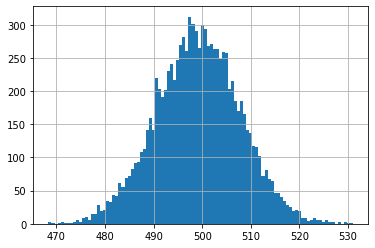

In [30]:
pd.Series(sample_mean).hist(bins=100)